In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
import import_ipynb
from SNF_pca import meta, fused_labels

importing Jupyter notebook from SNF_pca.ipynb
nx.html


In [3]:
fused_labels

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1], dtype=int32)

In [4]:
# to make labels match with clustering
def swap_labels(fused_labels):
    new_labels = []
    for i in fused_labels:
        if i == 0:
            new_labels.append(1)
        else:
            new_labels.append(0)
    return np.array(new_labels)

fused_labels = swap_labels(fused_labels)

In [5]:
meta['fused_labels'] = fused_labels

# Split patients by cluster
num_clusters = max(meta['fused_labels'])+1
clusters = []
for i in range(num_clusters):
    cluster = meta[meta['fused_labels']==i]
    print(len(cluster))
    clusters.append(cluster)
meta.drop('fused_labels', axis=1, inplace=True)

125
57


/home/bridgetl/.conda/envs/fresh-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/bridgetl/.conda/envs/fresh-env/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Proportion of cases/controls

In [6]:
meta['Case'].value_counts()

CASE    157
CTRL     25
Name: Case, dtype: int64

In [7]:
mfs = []
for cluster in clusters:
    mfs.append(cluster['Case'].value_counts(normalize=True))

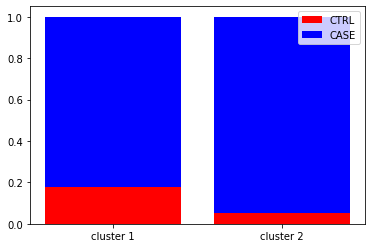

In [8]:
plt.figure()

x, y1, y2 = [], [], []
for i, mf in enumerate(mfs):
    x.append("cluster " + str(i+1))
    
    if 'CTRL' in mf:
        y1.append(mf['CTRL'])
    else:
        y1.append(0)
        
    if 'CASE' in mf:
        y2.append(mf['CASE'])
    else:
        y2.append(0)

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.legend(["CTRL", "CASE"])

plt.show()

### Proportion of males/females

In [9]:
mfs = []
for cluster in clusters:
    mfs.append(cluster['Sex.x'].value_counts(normalize=True))

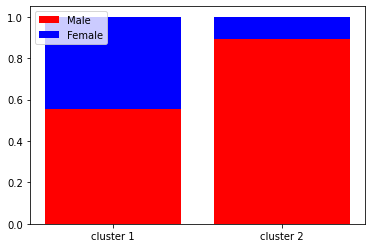

In [10]:
plt.figure()

x, y1, y2 = [], [], []
for i, mf in enumerate(mfs):
    x.append("cluster " + str(i+1))
    
    if 'Male' in mf:
        y1.append(mf['Male'])
    else:
        y1.append(0)
        
    if 'Female' in mf:
        y2.append(mf['Female'])
    else:
        y2.append(0)

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.legend(["Male", "Female"])

plt.show()

### Covariates

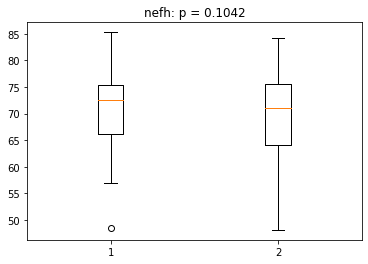

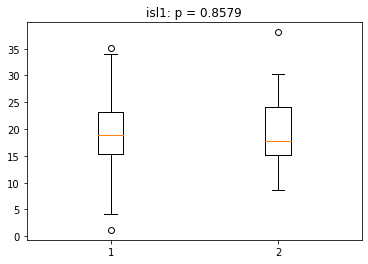

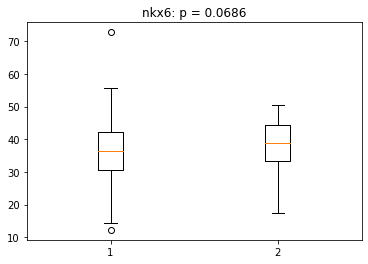

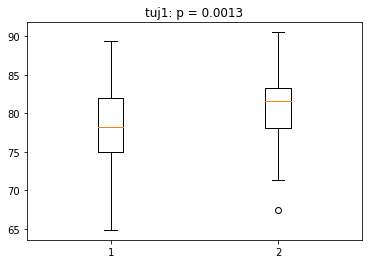

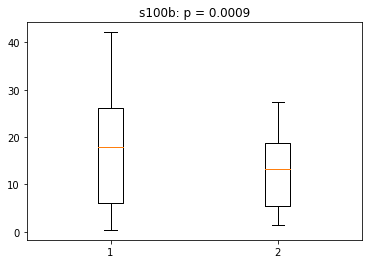

In [11]:
covariates = ['nefh', 'isl1', 'nkx6', 'tuj1', 's100b']

for cov in covariates:
    data = []
    for cluster in clusters:
        data.append([x for x in cluster[cov] if str(x) != 'nan'])
        
#     plt.scatter([1]*len(cov0), cov0, s=[0.1]*len(cov0))
#     plt.scatter([2]*len(cov1), cov1, s=[0.1]*len(cov1))
    result = ttest_ind(data[0], data[1], equal_var=False)
    
    plt.figure()
    plt.boxplot(data)
    plt.title(cov + ": p = " + "{:.4f}".format(result.pvalue))
    plt.show()